<a href="https://colab.research.google.com/github/mapanareGEO/opencvII-project2/blob/master/Project1_Virtual_Makeup_EYELINER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="blue">Project1: Virtual Makeup </font>
We have already seen interesting applications of facial features and landmarks such as aging, beardify, face swap etc.

In this project, you will build features for a Virtual Makeup application! Given below are a few features that are required to be built in the application. 

1. Apply Lipstick
1. Apply Blush
1. Apply Eye-Liners or Eye-Lashes
1. Apply Glasses
1. Apply Eye Color ( Lens Color)
1. Apply Hat/Cap
1. Apply Ear-Rings
1. Change Hair Color

### <font color="green">Your Task</font>
Implement any 2 features from the list above

We have provided a sample image. You can use your own image for experimentation as well as come up with other interesting features.

### <font color="green">Submission</font>
Once you are done, you have to create a video, explaining the main part of the code, upload it to youtube or any other video sharing service and provide the link in the form given in the submission section of the course.

### <font color="green">Marks Distribution</font>

1. Feature 1: 35 marks
1. Video for Feature 1: 15 marks
1. Feature 2: 35 marks
1. Video for Feature 2: 15 marks

In [14]:
import cv2,sys,dlib,time,math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load faceBlendCommon file to use common functions.

In [15]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

In [16]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [17]:
# Load faceBlendCommon file to use common functions.
import sys
sys.path.append("drive/My Drive/Colab Notebooks/")  # path contains python_file.py

import faceBlendCommon as fbc

# <font color="blue">Load landmark detector</font>
We have provided code for loading the model for landmark detector.

In [18]:
# Landmark model location
PREDICTOR_PATH =  "drive/My Drive/Colab Notebooks/shape_predictor_68_face_landmarks.dat"
# Get the face detector
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

# <font color="blue">Read Image</font>
We load the image and convert it to RGB format so that it can be used by Dlib and also for displaying using matplotlib.

### <font color="red">You can also use any other image.</font> 

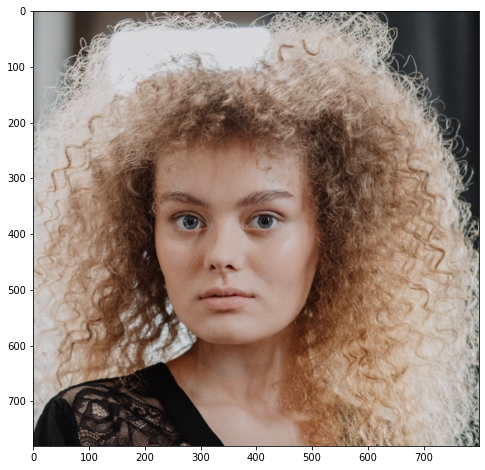

In [19]:
im = cv2.imread("drive/My Drive/Colab Notebooks/girl-no-makeup.jpg")

imDlib = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(imDlib)

# <font color="blue">Calculate Landmarks</font>
We are providing code for calculating the landmarks in this section. So that you can focus on the feature implementation.

In [20]:
points = fbc.getLandmarks(faceDetector, landmarkDetector, imDlib)
print(points)

[(216, 375), (217, 411), (224, 446), (233, 480), (242, 515), (258, 547), (283, 574), (313, 594), (350, 600), (390, 595), (430, 579), (464, 557), (488, 524), (501, 487), (508, 447), (513, 408), (514, 369), (223, 343), (241, 326), (268, 325), (293, 333), (317, 346), (362, 345), (389, 331), (418, 321), (449, 321), (474, 336), (338, 374), (337, 397), (335, 419), (333, 442), (315, 465), (326, 468), (337, 471), (351, 468), (364, 465), (252, 378), (268, 368), (289, 369), (307, 385), (287, 390), (266, 389), (382, 384), (401, 369), (423, 367), (441, 375), (426, 387), (404, 389), (293, 517), (310, 503), (327, 496), (340, 500), (353, 496), (376, 502), (401, 514), (377, 528), (356, 535), (341, 536), (326, 535), (310, 530), (303, 516), (327, 512), (340, 512), (354, 511), (391, 513), (354, 512), (341, 513), (327, 513)]


# <font color="blue">TODO</font>
You have to implement 2 features from the above list. You can also think about a new feature and implement. 


# <font color="blue">Feature 1</font>
Write code for the first feature you want to implement from the above list. Display the output image after writing the code.

# <font color="blue">Feature 2</font>
Write code for the second feature you want to implement from the above list. Display the output image after writing the code.

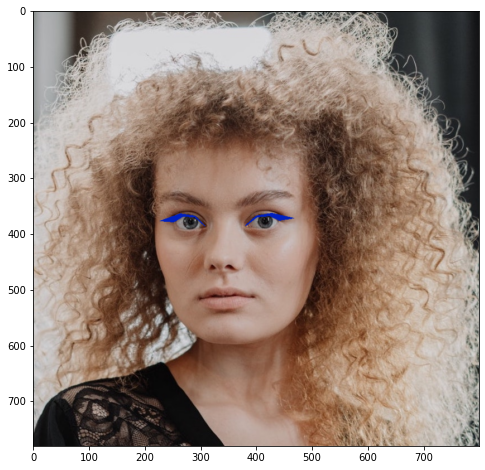

In [21]:

"""
Feature 2
Write code for the second feature you want to implement from the above list. 
Display the output image after writing the code.
"""

# Feature 2 Apply Eye-Liners or Eye-Lashes
image2=im.copy()

mask4=np.zeros(image2.shape,dtype=np.uint8)
# left eye landmarks index
list3=[36,37,38,39,40,41]
# right eye landmarks index
list4=[42,43,44,45,46,47]

leftEye=np.zeros((6,2))
counter =0
for i in list3:
    leftEye[counter]=(points[i][0],points[i][1])
    counter+=1
    
centerLeft=np.mean(leftEye, axis = 0)   

rightEye=np.zeros((6,2))
counter =0
for i in list4:
    rightEye[counter]=(points[i][0],points[i][1])
    counter+=1
    
centerLeft=np.mean(leftEye, axis = 0)   
centerRight=np.mean(rightEye, axis = 0)   

increaseL=[1.05,1.15,1.4,1.95] 
increaseR=[1.95,1.4,1.15,1.05]
linerLeft=np.zeros((9,2))  
linerRight=np.zeros((9,2))

counter =0
for i in list3:
    if counter<=3:
        linerLeft[counter]=(points[i][0],points[i][1])
        counter+=1
       
for i in range(4): 
        newX=centerLeft[0]+(linerLeft[3-i][0]-centerLeft[0])*increaseL[i]
        newY=centerLeft[1]+(linerLeft[3-i][1]-centerLeft[1])*increaseL[i]
        linerLeft[i+4][0]=int(newX)
        linerLeft[i+4][1]=int(newY) 
    
puntos8=[]

for i in range(8):
    puntos8=puntos8+[int(linerLeft[i][0]),int(linerLeft[i][1])]

puntos8=np.array(puntos8)
puntos8 = puntos8.reshape((-1, 1, 2)) 

white=(255,255,255)

cv2.fillPoly(mask4, [puntos8], white)

# right eye  

counter =0
for i in list4:
    if counter<=3:
        linerRight[counter]=(points[i][0],points[i][1])
        counter+=1
       
for i in range(4): 
        newX=centerRight[0]+(linerRight[3-i][0]-centerRight[0])*increaseR[i]
        newY=centerRight[1]+(linerRight[3-i][1]-centerRight[1])*increaseR[i]
        linerRight[i+4][0]=int(newX)
        linerRight[i+4][1]=int(newY) 

puntos9=[]

for i in range(8):
    puntos9=puntos9+[int(linerRight[i][0]),int(linerRight[i][1])]

puntos9=np.array(puntos9)
puntos9 = puntos9.reshape((-1, 1, 2)) 

cv2.fillPoly(mask4, [puntos9], liner)

imrgb2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)           

foreground = np.ones(image2.shape,dtype=np.uint8)

# assign color to eyeliner
foreground[:] = (192 ,32,0)

# Save the alpha information into a single Mat
#alpha = cv2.merge((mask4,mask4,mask4))
alpha=mask4

# Read background image
background = im.copy()

# Convert uint8 to float
foreground = foreground.astype(float)
background = background.astype(float)
alpha = alpha.astype(float)/255

# Perform alpha blending
foreground = cv2.multiply(alpha, foreground)
background = cv2.multiply(1.0 - alpha, background)
outImage = cv2.add(foreground, background)

outImage = outImage.astype(np.uint8)

lipsRGB=cv2.cvtColor(outImage,cv2.COLOR_BGR2RGB)

#display output
plt.imshow(lipsRGB)
plt.show()

